In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d apollo2506/eurosat-dataset
!unzip eurosat-dataset.zip -d ./eurosat_data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./eurosat_data/EuroSATallBands/River/River_1990.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1991.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1992.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1993.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1994.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1995.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1996.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1997.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1998.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1999.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_2.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_20.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_200.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_2000.tif  
  inflating

In [ ]:
!pip install tifffile

In [ ]:
import tifffile as tiff
import numpy as np

# Đường dẫn đến 1 ảnh cụ thể
img_path = "/content/eurosat_data/EuroSATallBands/AnnualCrop/AnnualCrop_1.tif"

# Đọc ảnh
img = tiff.imread(img_path)

# In shape và giá trị pixel đầu tiên
print("Shape của ảnh:", img.shape)
print("Pixel đầu tiên:", img[0, 0])

Shape của ảnh: (64, 64, 13)
Pixel đầu tiên: [1420 1291 1291 1600 1680 1841 2045 2016  546   13 3083 2325 2319]


In [ ]:
# Chuẩn hóa giá trị pixel trong dải từ 0 đến 1
img_normalized = img / np.max(img)

print(np.max(img))

# Kiểm tra pixel sau khi chuẩn hóa
print("Pixel đầu tiên (sau khi chuẩn hóa):", img_normalized[0, 0])

3490
Pixel đầu tiên (sau khi chuẩn hóa): [0.40687679 0.36991404 0.36991404 0.45845272 0.48137536 0.52750716
 0.58595989 0.57765043 0.15644699 0.00372493 0.88338109 0.66618911
 0.66446991]


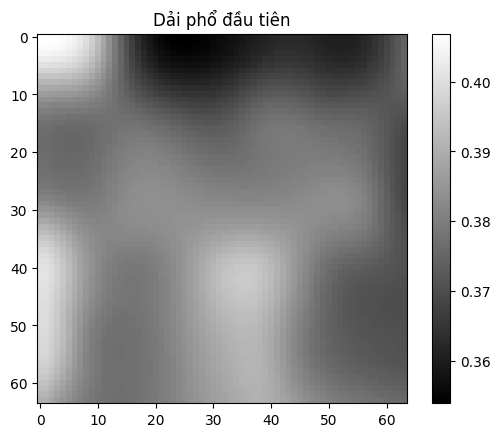

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị ảnh với các dải phổ khác nhau
plt.imshow(img_normalized[:, :, 0], cmap='gray')  # Hiển thị dải phổ đầu tiên (hoặc bạn có thể chọn dải phổ khác)
plt.title("Dải phổ đầu tiên")
plt.colorbar()
plt.show()


In [ ]:
import os

root_dir = "/content/eurosat_data/EuroSATallBands"

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # chỉ in 5 file đầu mỗi thư mục cho ngắn gọn
        print(f"{subindent}{f}")

EuroSATallBands/
  train.csv
  validation.csv
  label_map.json
  test.csv
  Pasture/
    Pasture_1336.tif
    Pasture_618.tif
    Pasture_476.tif
    Pasture_838.tif
    Pasture_1281.tif
  SeaLake/
    Jakarta_000423.tif
    SeaLake_915.tif
    SeaLake_2169.tif
    SeaLake_632.tif
    Jakarta_000404.tif
  Highway/
    Highway_2181.tif
    Highway_2415.tif
    Highway_940.tif
    Highway_1784.tif
    Highway_867.tif
  HerbaceousVegetation/
    HerbaceousVegetation_1205.tif
    HerbaceousVegetation_2584.tif
    HerbaceousVegetation_2123.tif
    HerbaceousVegetation_1542.tif
    HerbaceousVegetation_487.tif
  Residential/
    Residential_2864.tif
    Residential_2790.tif
    Residential_2053.tif
    Residential_612.tif
    Residential_2283.tif
  AnnualCrop/
    AnnualCrop_1213.tif
    AnnualCrop_1817.tif
    AnnualCrop_2212.tif
    AnnualCrop_1960.tif
    AnnualCrop_1468.tif
  Forest/
    Forest_1505.tif
    Forest_2632.tif
    Forest_1708.tif
    Forest_2221.tif
    Forest_1000.tif
  Riv

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 97.5 MB/s eta 0:00:00


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Tạo transform
train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
import pandas as pd
import os
import torch
from torch.utils.data import Dataset
import rasterio
import numpy as np
from torchvision import transforms

class EuroSATCSV(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.root_dir, row['Filename'])
        label = int(row['Label'])

        with rasterio.open(img_path) as src:
            img = src.read().astype(np.float32)  # (13, 64, 64)
            img = img / 10000.0
            img = np.transpose(img, (1, 2, 0))  # (H, W, C) cho albumentations

        if self.transform:
            img = self.transform(image=img)["image"]  # có thể là Tensor

        if isinstance(img, np.ndarray):
            # Nếu là ndarray thì chuyển về (C, H, W)
            img = img.transpose((2, 0, 1))
            img = torch.tensor(img, dtype=torch.float32)
        elif isinstance(img, torch.Tensor):
            if img.ndim == 3 and img.shape[0] != 13:
                img = img.permute(2, 0, 1).float()

        # print(f"DEBUG - Image shape: {img.shape}")
        return img, label

In [ ]:
base_path = "/content/eurosat_data/EuroSATallBands"

train_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "train.csv"),
    root_dir=base_path,
    transform=train_transform
)

val_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "validation.csv"),
    root_dir=base_path,
    transform=val_transform
)

test_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "test.csv"),
    root_dir=base_path,
    transform=val_transform
)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


XAI


In [ ]:
import torch

save_path = "/content/drive/MyDrive/Colab Notebooks/Model/mobilenet13bands_unfrozenall.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(save_path, map_location=device, weights_only=False)
model.eval().to(device)


VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): Conv2d(13, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (drop): Identity()
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            

In [ ]:
import shap
import torch
import numpy as np
import matplotlib.pyplot as plt

# Tìm background từ train_loader (label = 7)
background_images = []
background_labels = []

for batch in train_loader:
    imgs, labels = batch
    for img, label in zip(imgs, labels):
        if label.item() == 3:
            background_images.append(img)
            background_labels.append(label)
        if len(background_images) == 20:
            break
    if len(background_images) == 20:
        break

# Tìm 1 test image từ val_loader (label = )
test_image = None
test_label = None

for batch in val_loader:
    imgs, labels = batch
    for img, label in zip(imgs, labels):
        if label.item() == 3:
            test_image = img.unsqueeze(0)  # giữ batch dim
            test_label = label
            break
    if test_image is not None:
        break

# Đưa lên GPU
background_data = torch.stack(background_images).to(device)
test_image = test_image.to(device)

# Kiểm tra
print("Background labels:", [lbl.item() for lbl in background_labels])
print("Test label:", test_label.item())


Background labels: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Test label: 3


In [ ]:
print("Label của ảnh test:", test_label.item())

print("Label của 5 ảnh background:")
for i, label in enumerate(background_labels):
    print(f"  Ảnh background {i+1}: Label = {label.item()}")


Label của ảnh test: 3
Label của 5 ảnh background:
  Ảnh background 1: Label = 3
  Ảnh background 2: Label = 3
  Ảnh background 3: Label = 3
  Ảnh background 4: Label = 3
  Ảnh background 5: Label = 3
  Ảnh background 6: Label = 3
  Ảnh background 7: Label = 3
  Ảnh background 8: Label = 3
  Ảnh background 9: Label = 3
  Ảnh background 10: Label = 3
  Ảnh background 11: Label = 3
  Ảnh background 12: Label = 3
  Ảnh background 13: Label = 3
  Ảnh background 14: Label = 3
  Ảnh background 15: Label = 3
  Ảnh background 16: Label = 3
  Ảnh background 17: Label = 3
  Ảnh background 18: Label = 3
  Ảnh background 19: Label = 3
  Ảnh background 20: Label = 3


In [ ]:
# GradientExplainer hoạt động tốt hơn với mô hình không chuẩn như ViT
explainer = shap.GradientExplainer(model, background_data)

# Dự đoán lớp của test_image
model.eval()
with torch.no_grad():
    pred_logits = model(test_image)
    pred_class = torch.argmax(pred_logits, dim=1).item()

# Tính SHAP values cho lớp dự đoán
shap_values = explainer.shap_values(test_image, ranked_outputs=1)


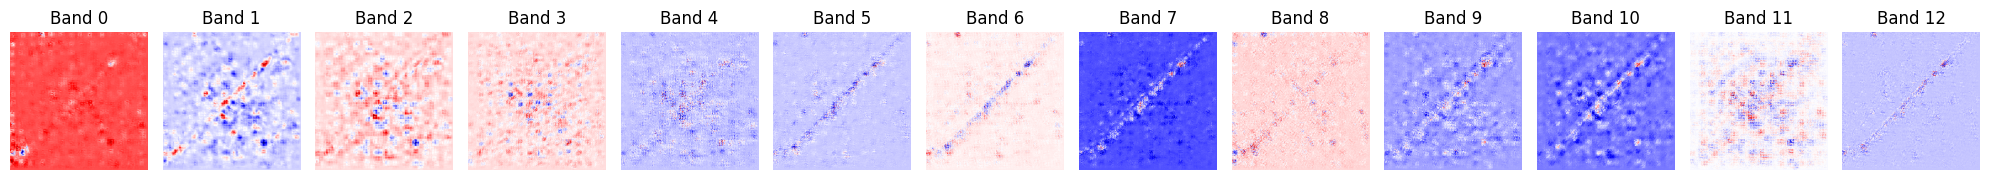

In [ ]:
# shap_values là list 1 phần tử, lấy phần đầu
shap_map = shap_values[0][0]  # shape: [13, H, W]

# Hiển thị từng channel
fig, axes = plt.subplots(1, 13, figsize=(20, 2))
for i in range(13):
    axes[i].imshow(shap_map[i], cmap='seismic')
    axes[i].set_title(f'Band {i}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


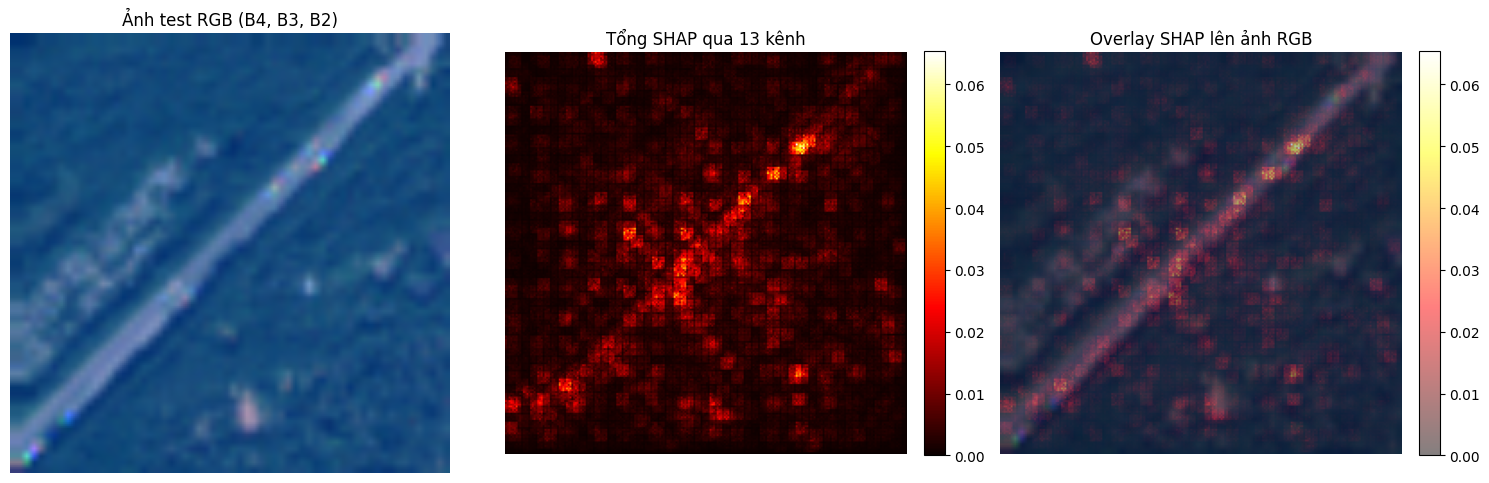

In [ ]:
fffimport matplotlib.pyplot as plt
import numpy as np

# Gộp SHAP qua tất cả các kênh
total_shap = np.abs(shap_map).sum(axis=0)  # shape: [H, W]

# Lấy ảnh test gốc (1 ảnh, 13 kênh)
test_img_tensor = test_image[0].detach().cpu()  # shape: [13, H, W]

# Giả lập RGB từ các kênh B4 (R), B3 (G), B2 (B) → index 3, 2, 1
pseudo_rgb = test_img_tensor[[3, 2, 1]].permute(1, 2, 0).numpy()

# Chuẩn hóa về [0, 1] để hiển thị đẹp
pseudo_rgb = (pseudo_rgb - pseudo_rgb.min()) / (pseudo_rgb.max() - pseudo_rgb.min())

# Vẽ 3 ảnh: RGB, SHAP, Overlay
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Ảnh RGB
axs[0].imshow(pseudo_rgb)
axs[0].set_title("Ảnh test RGB (B4, B3, B2)")
axs[0].axis('off')

# Bản đồ SHAP tổng
im1 = axs[1].imshow(total_shap, cmap='hot')
axs[1].set_title("Tổng SHAP qua 13 kênh")
axs[1].axis('off')
plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

# Overlay SHAP lên RGB
axs[2].imshow(pseudo_rgb)
im2 = axs[2].imshow(total_shap, cmap='hot', alpha=0.5)
axs[2].set_title("Overlay SHAP lên ảnh RGB")
axs[2].axis('off')
plt.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


Mô hình vit_base_r50_s16_224 (Hybrid CNN + ViT)

In [ ]:
import timm
import torch
import torch.nn as nn

def create_hybrid_vit_13channels(num_classes=10):
    model = timm.create_model('vit_base_r50_s16_224', pretrained=True)

    # Truy cập vào stem của ResNet backbone
    stem = model.patch_embed.backbone.stem
    old_conv = stem[0]  # stem là nn.Sequential -> conv1 là layer đầu tiên

    # Tạo Conv2d mới với 13 kênh đầu vào
    new_conv = nn.Conv2d(
        in_channels=13,
        out_channels=old_conv.out_channels,
        kernel_size=old_conv.kernel_size,
        stride=old_conv.stride,
        padding=old_conv.padding,
        bias=old_conv.bias is not None
    )

    # Copy trọng số từ 3 kênh đầu tiên và khởi tạo phần còn lại
    with torch.no_grad():
        new_conv.weight[:, :3] = old_conv.weight
        if new_conv.in_channels > 3:
            nn.init.kaiming_normal_(new_conv.weight[:, 3:])

    # Gán lại conv1 vào vị trí đầu tiên của stem
    stem[0] = new_conv

    # Sửa head để phù hợp số lớp đầu ra
    model.head = nn.Linear(model.num_features, num_classes)

    return model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = create_hybrid_vit_13channels(num_classes=10).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/392M [00:00<?, ?B/s]

In [ ]:
import torch.nn.functional as F
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct = 0.0, 0
    total = 0

    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    accuracy = correct / total
    return epoch_loss, accuracy

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct = 0.0, 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    accuracy = correct / total
    return epoch_loss, accuracy

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
num_epochs = 50

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

early_stopping = EarlyStopping(patience=7)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)


for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")
    print(f"  Val loss  : {val_loss:.4f} | Accuracy: {val_acc:.4f}")

    # In Learning Rate hiện tại
    for param_group in optimizer.param_groups:
        print(f"  Current learning rate: {param_group['lr']:.6f}")

    # Step scheduler
    scheduler.step(val_loss)

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50
  Train loss: 1.1204 | Accuracy: 0.5885
  Val loss  : 0.5413 | Accuracy: 0.8152
  Current learning rate: 0.000300


Epoch 2/50
  Train loss: 0.4925 | Accuracy: 0.8308
  Val loss  : 0.4361 | Accuracy: 0.8469
  Current learning rate: 0.000300


Epoch 3/50
  Train loss: 0.3600 | Accuracy: 0.8796
  Val loss  : 0.2974 | Accuracy: 0.9013
  Current learning rate: 0.000300


Epoch 4/50
  Train loss: 0.2871 | Accuracy: 0.9012
  Val loss  : 0.2573 | Accuracy: 0.9138
  Current learning rate: 0.000300


Epoch 5/50
  Train loss: 0.2666 | Accuracy: 0.9119
  Val loss  : 0.1900 | Accuracy: 0.9362
  Current learning rate: 0.000300


Epoch 6/50
  Train loss: 0.2340 | Accuracy: 0.9218
  Val loss  : 0.2373 | Accuracy: 0.9243
  Current learning rate: 0.000300
EarlyStopping counter: 1/7


Epoch 7/50
  Train loss: 0.2174 | Accuracy: 0.9279
  Val loss  : 0.1874 | Accuracy: 0.9377
  Current learning rate: 0.000300


Epoch 8/50
  Train loss: 0.1937 | Accuracy: 0.9355
  Val loss  : 0.1454 | Accuracy: 0.9500
  Current learning rate: 0.000300


Epoch 9/50
  Train loss: 0.1840 | Accuracy: 0.9388
  Val loss  : 0.1552 | Accuracy: 0.9464
  Current learning rate: 0.000300
EarlyStopping counter: 1/7


Epoch 10/50
  Train loss: 0.1592 | Accuracy: 0.9474
  Val loss  : 0.1883 | Accuracy: 0.9380
  Current learning rate: 0.000300
EarlyStopping counter: 2/7


Epoch 11/50
  Train loss: 0.1575 | Accuracy: 0.9474
  Val loss  : 0.1259 | Accuracy: 0.9583
  Current learning rate: 0.000300


Epoch 12/50
  Train loss: 0.1490 | Accuracy: 0.9504
  Val loss  : 0.1291 | Accuracy: 0.9581
  Current learning rate: 0.000300
EarlyStopping counter: 1/7


Epoch 13/50
  Train loss: 0.1408 | Accuracy: 0.9536
  Val loss  : 0.1048 | Accuracy: 0.9661
  Current learning rate: 0.000300


Epoch 14/50
  Train loss: 0.1369 | Accuracy: 0.9566
  Val loss  : 0.1371 | Accuracy: 0.9556
  Current learning rate: 0.000300
EarlyStopping counter: 1/7


Epoch 15/50
  Train loss: 0.1235 | Accuracy: 0.9593
  Val loss  : 0.1245 | Accuracy: 0.9591
  Current learning rate: 0.000300
EarlyStopping counter: 2/7


Epoch 16/50
  Train loss: 0.1260 | Accuracy: 0.9591
  Val loss  : 0.1273 | Accuracy: 0.9585
  Current learning rate: 0.000300
EarlyStopping counter: 3/7


Epoch 17/50
  Train loss: 0.1166 | Accuracy: 0.9620
  Val loss  : 0.1185 | Accuracy: 0.9619
  Current learning rate: 0.000300
EarlyStopping counter: 4/7


Epoch 18/50
  Train loss: 0.0751 | Accuracy: 0.9745
  Val loss  : 0.1180 | Accuracy: 0.9605
  Current learning rate: 0.000150
EarlyStopping counter: 5/7


Epoch 19/50
  Train loss: 0.0727 | Accuracy: 0.9754
  Val loss  : 0.0884 | Accuracy: 0.9703
  Current learning rate: 0.000150


Epoch 20/50
  Train loss: 0.0689 | Accuracy: 0.9774
  Val loss  : 0.0765 | Accuracy: 0.9763
  Current learning rate: 0.000150


Epoch 21/50
  Train loss: 0.0668 | Accuracy: 0.9778
  Val loss  : 0.1069 | Accuracy: 0.9670
  Current learning rate: 0.000150
EarlyStopping counter: 1/7


Epoch 22/50
  Train loss: 0.0645 | Accuracy: 0.9784
  Val loss  : 0.0849 | Accuracy: 0.9725
  Current learning rate: 0.000150
EarlyStopping counter: 2/7


Epoch 23/50
  Train loss: 0.0615 | Accuracy: 0.9794
  Val loss  : 0.0830 | Accuracy: 0.9721
  Current learning rate: 0.000150
EarlyStopping counter: 3/7


Epoch 24/50
  Train loss: 0.0596 | Accuracy: 0.9798
  Val loss  : 0.0930 | Accuracy: 0.9723
  Current learning rate: 0.000150
EarlyStopping counter: 4/7


Epoch 25/50
  Train loss: 0.0370 | Accuracy: 0.9880
  Val loss  : 0.0680 | Accuracy: 0.9766
  Current learning rate: 0.000075


Epoch 26/50
  Train loss: 0.0344 | Accuracy: 0.9890
  Val loss  : 0.0751 | Accuracy: 0.9761
  Current learning rate: 0.000075
EarlyStopping counter: 1/7


Epoch 27/50
  Train loss: 0.0328 | Accuracy: 0.9890
  Val loss  : 0.0711 | Accuracy: 0.9774
  Current learning rate: 0.000075
EarlyStopping counter: 2/7


Epoch 28/50
  Train loss: 0.0287 | Accuracy: 0.9900
  Val loss  : 0.0763 | Accuracy: 0.9745
  Current learning rate: 0.000075
EarlyStopping counter: 3/7


Epoch 29/50
  Train loss: 0.0296 | Accuracy: 0.9899
  Val loss  : 0.0771 | Accuracy: 0.9779
  Current learning rate: 0.000075
EarlyStopping counter: 4/7


Epoch 30/50
  Train loss: 0.0186 | Accuracy: 0.9937
  Val loss  : 0.0695 | Accuracy: 0.9784
  Current learning rate: 0.000037
EarlyStopping counter: 5/7


Epoch 31/50
  Train loss: 0.0177 | Accuracy: 0.9944
  Val loss  : 0.0752 | Accuracy: 0.9799
  Current learning rate: 0.000037
EarlyStopping counter: 6/7


Epoch 32/50
  Train loss: 0.0149 | Accuracy: 0.9953
  Val loss  : 0.0880 | Accuracy: 0.9763
  Current learning rate: 0.000037
EarlyStopping counter: 7/7
Early stopping triggered.


In [ ]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test loss: {test_loss:.4f} | Accuracy: {test_acc:.4f}")

Test loss: 0.0847 | Accuracy: 0.9804


In [ ]:
save_path = "/content/drive/MyDrive/Document for Capstone/T_Capstone draft2 CNN-ViT.pth"
torch.save(model, save_path)